##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Load Train and Test Dataset

In [ ]:
train_path = 'gdrive/MyDrive/Colab Notebooks/Dataset/application_train.csv'
train = pd.read_csv(train_path)
print('Train dataset shape:', train.shape)
train.head()

Train dataset shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_path = '/content/gdrive/MyDrive/Colab Notebooks/Dataset/application_test.csv'
test = pd.read_csv(test_path)
print('Test dataset shape:', test.shape)
test.head()

Test dataset shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

In [ ]:
train.shape

(307511, 122)

##EDA

In [ ]:
  train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
#Classification ratio
ratio = (train.TARGET==0).sum()/(train.TARGET==1).sum()
print(ratio)

11.387150050352467


<function matplotlib.pyplot.show>

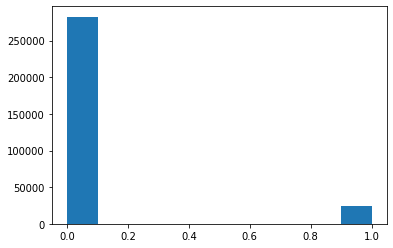

In [ ]:
plt.hist(train['TARGET'])
plt.show

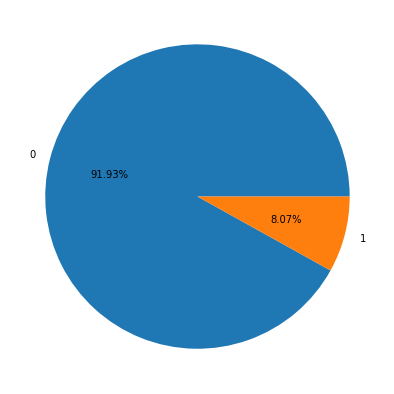

In [ ]:
target = train.groupby('TARGET').TARGET.count()
plt.figure(figsize=(10,7))
plt.pie(target, labels=target.index, autopct='%1.2f%%')
plt.show()

In [ ]:
import plotly.express as px
fig= px.pie(values=target, names= target.index,title= 'Target Percentage', width= 600, height=600)
fig.show()

In [ ]:
def cat_plot(feature, figsize=True, vertical_label=False):
    temp = train[feature].value_counts()
    dicts = {feature:temp.index, 'CONTRACT_COUNT':temp.values}
    df = pd.DataFrame(dicts)

    #calculating percentage with target = 1 from features
    feat_pct = train.groupby(feature, as_index=False).agg(percent_of_target_value_1=('TARGET','mean')).sort_values(by='percent_of_target_value_1', ascending=False)

    #CREATE Barplot of contract count and percentage of features and conditional statement if want to make wider layout
    if(figsize):
        fig, axes = plt.subplots(1,2, figsize=(12,6))
    else:
          fig, axes = plt.subplots(2,1, figsize=(12,15))

    bar_plot = sns.barplot(ax=axes[0], x=df[feature], y=df['CONTRACT_COUNT'])    
    if(vertical_label):
        bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)
    
    bar_plot = sns.barplot(ax=axes[1], x = feat_pct[feature], y=feat_pct['percent_of_target_value_1'])
    if(vertical_label):
        bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)

    plt.show()

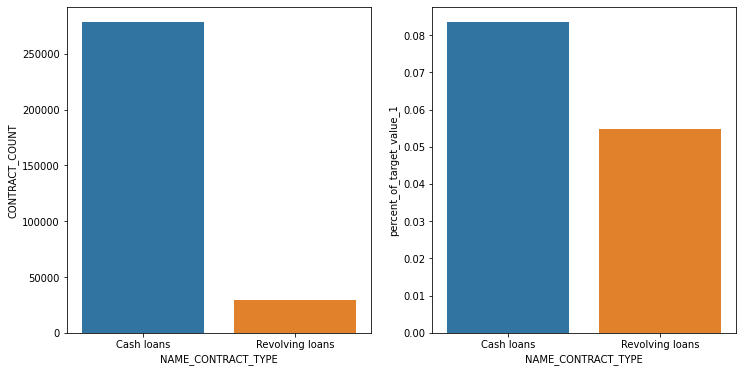

In [ ]:
cat_plot('NAME_CONTRACT_TYPE')

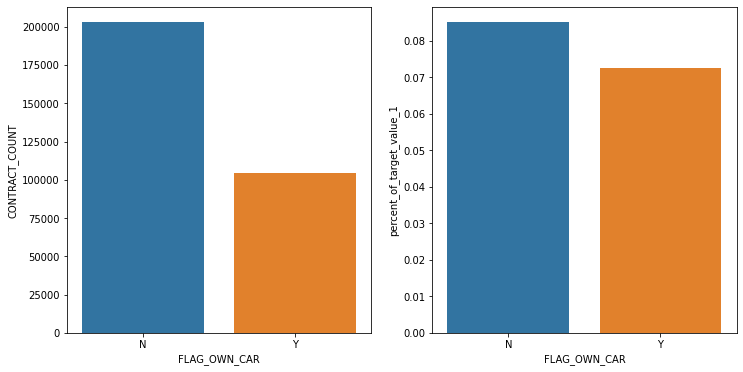

In [ ]:
cat_plot('FLAG_OWN_CAR')

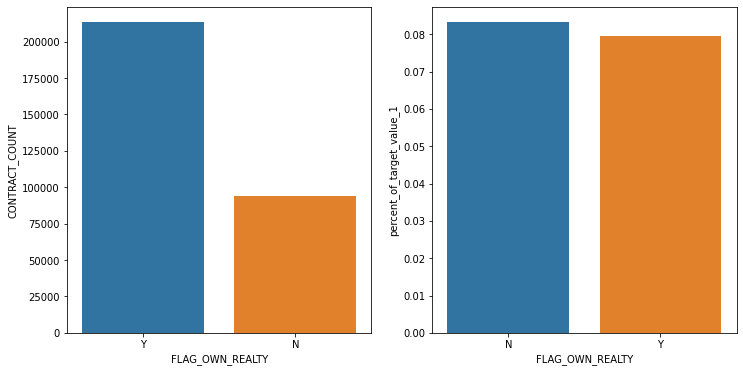

In [ ]:
cat_plot('FLAG_OWN_REALTY')

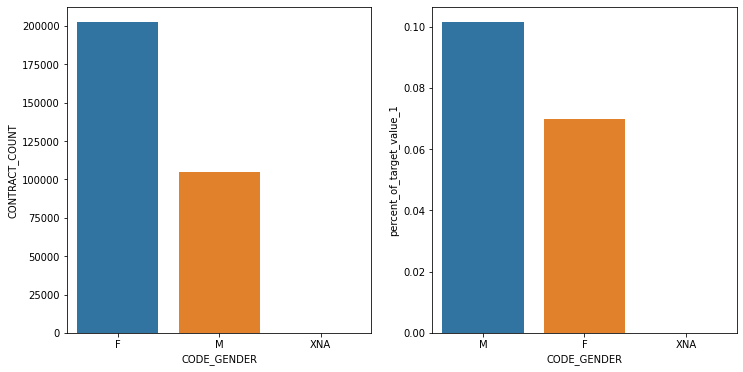

In [ ]:
cat_plot('CODE_GENDER')

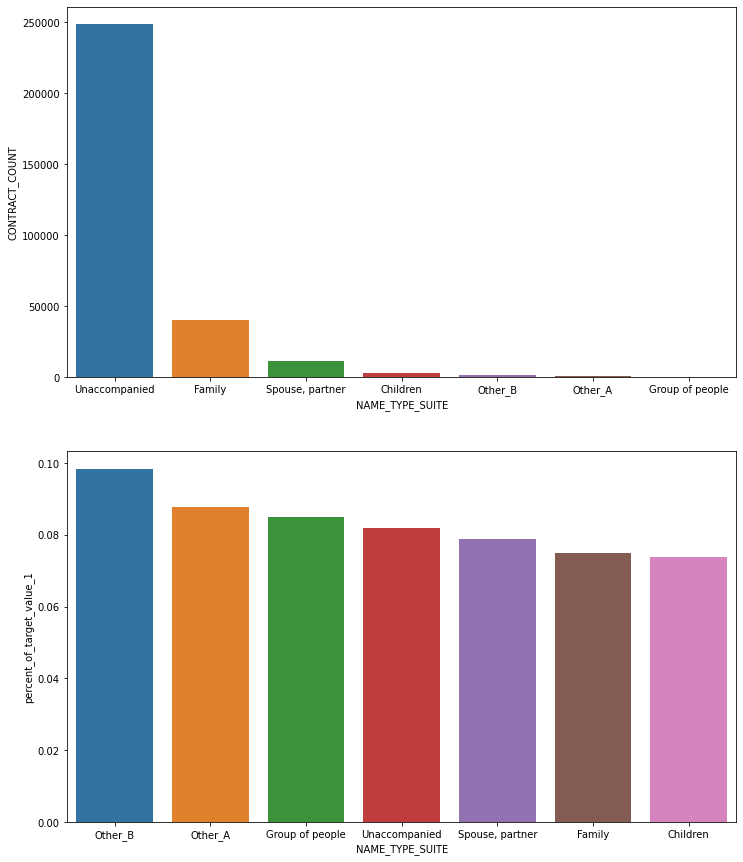

In [ ]:
cat_plot('NAME_TYPE_SUITE', False, False)

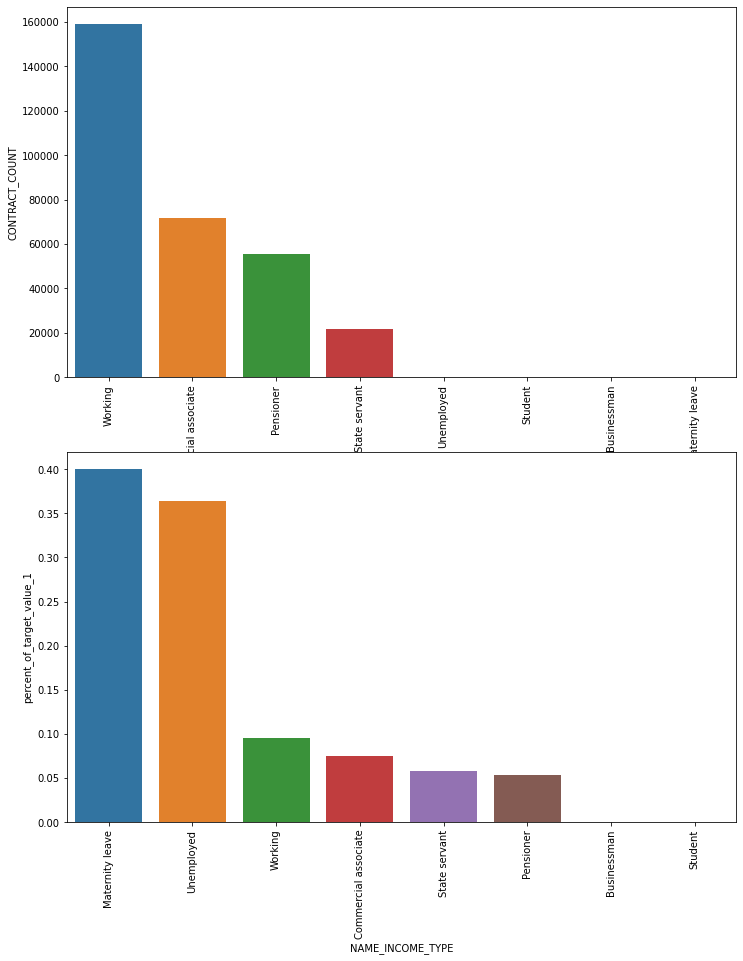

In [ ]:
cat_plot('NAME_INCOME_TYPE', False, True)	

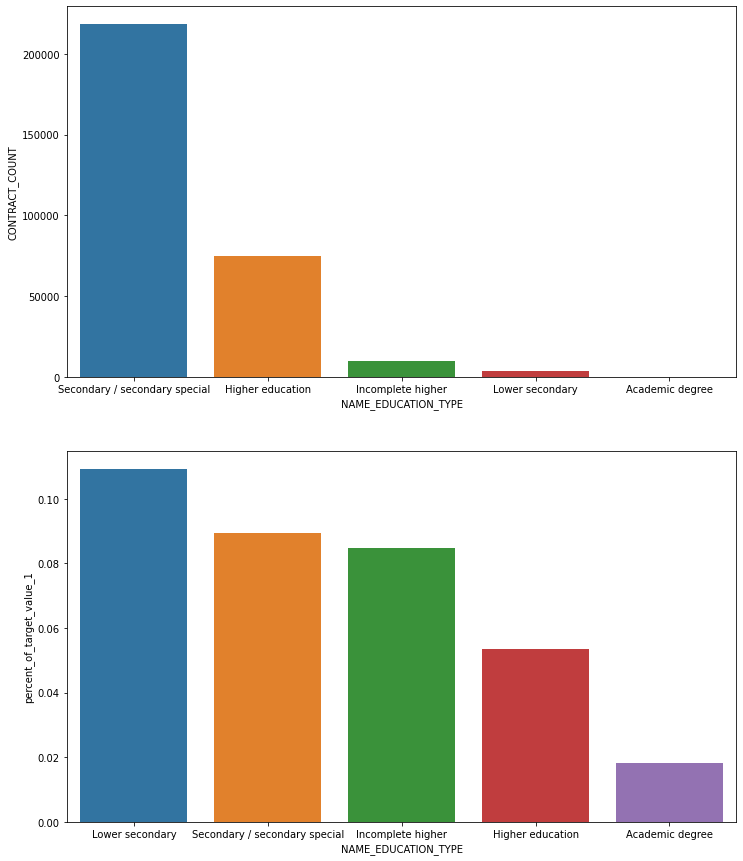

In [ ]:
cat_plot('NAME_EDUCATION_TYPE', False, False)	

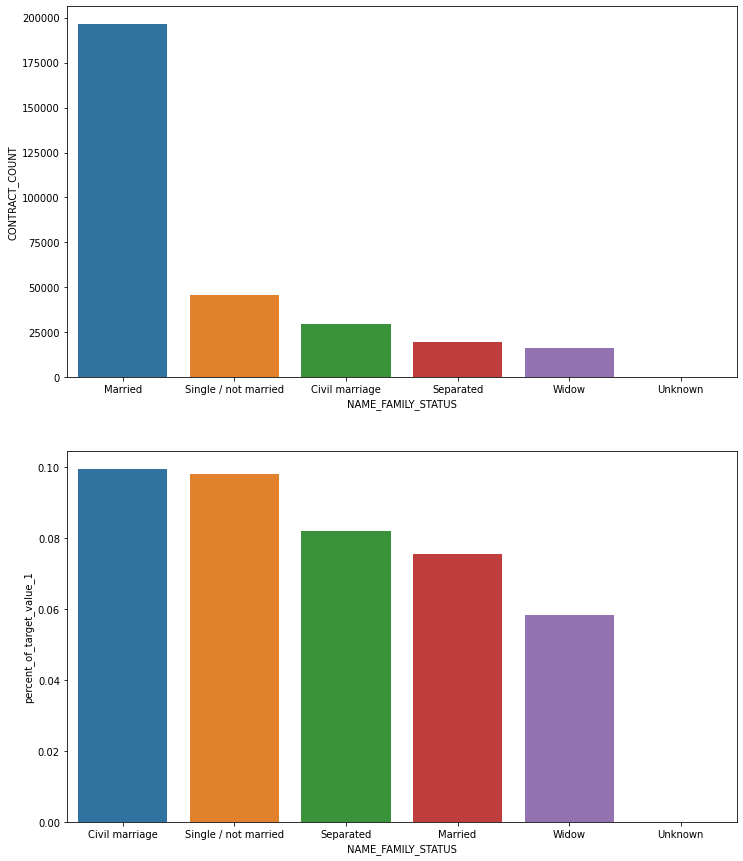

In [ ]:
cat_plot('NAME_FAMILY_STATUS', False, False)	

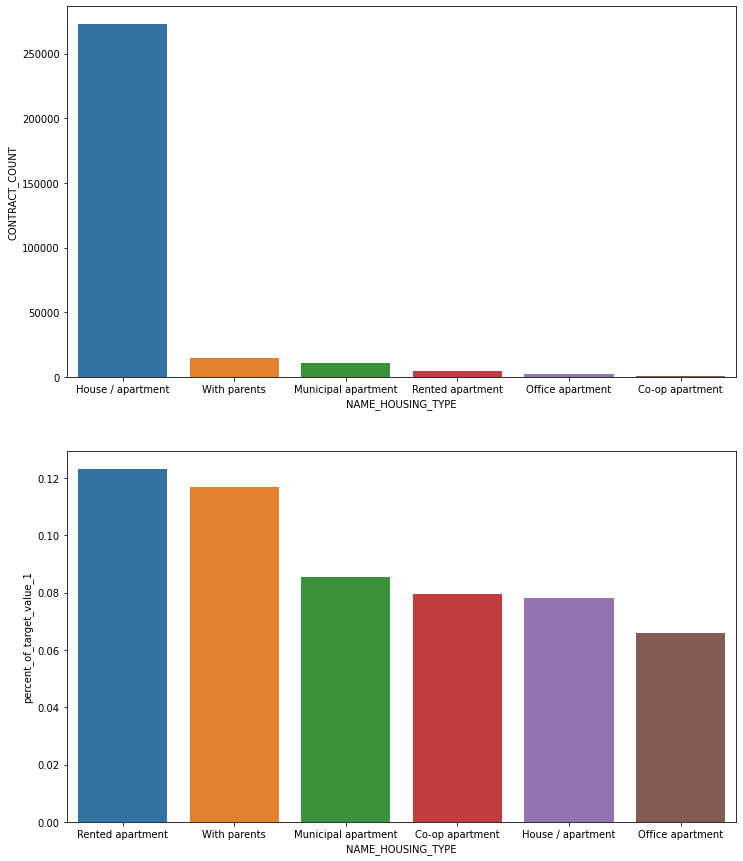

In [ ]:
cat_plot('NAME_HOUSING_TYPE', False, False)

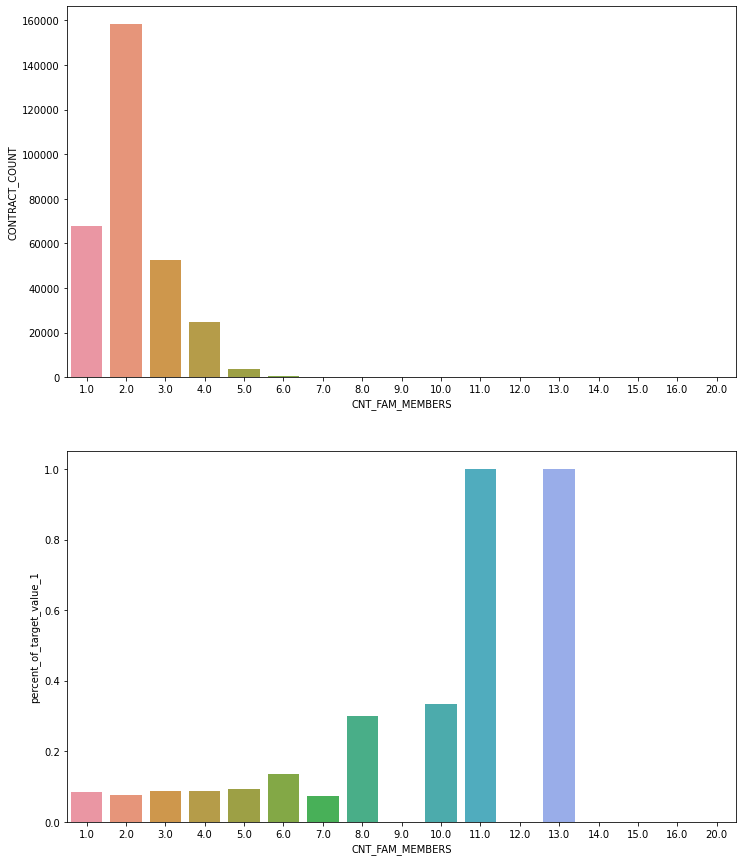

In [ ]:
cat_plot('CNT_FAM_MEMBERS', False, False)

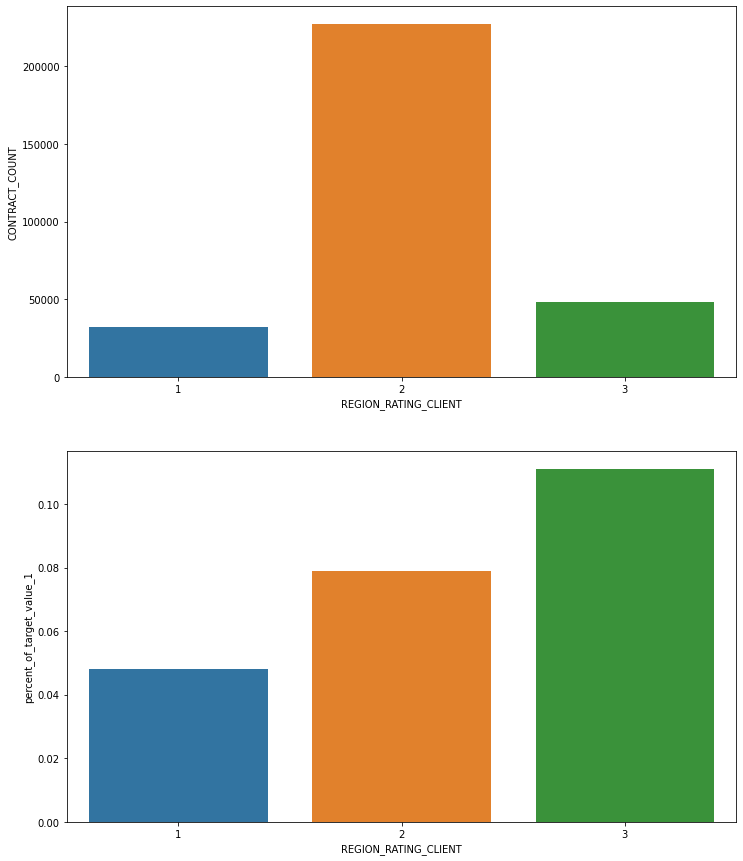

In [ ]:
cat_plot('REGION_RATING_CLIENT', False, False)

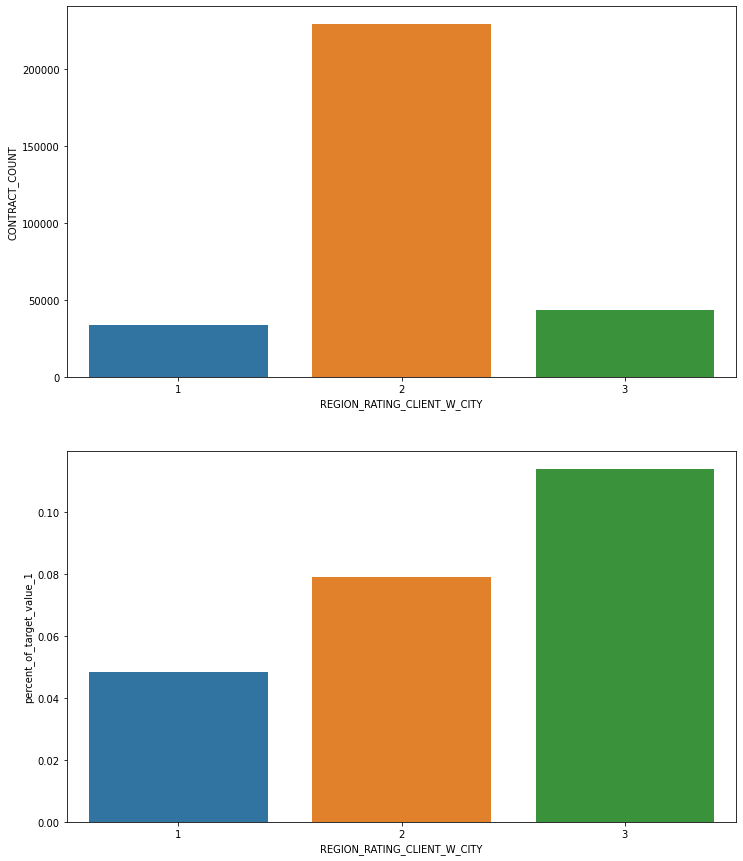

In [ ]:
cat_plot('REGION_RATING_CLIENT_W_CITY', False, False)

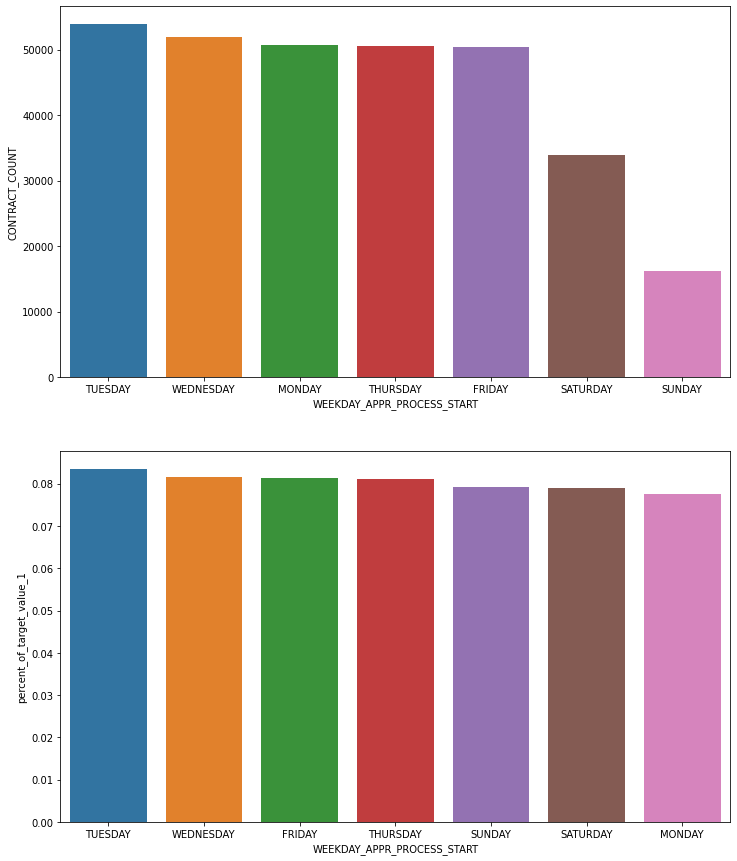

In [ ]:
cat_plot('WEEKDAY_APPR_PROCESS_START', False, False)

In [ ]:
def distribution_plot(df, feature):
    plt.figure(figsize=(10,7))
    plt.title('Distribution of %s' % feature)
    sns.distplot(df[feature].dropna(),kde=True)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



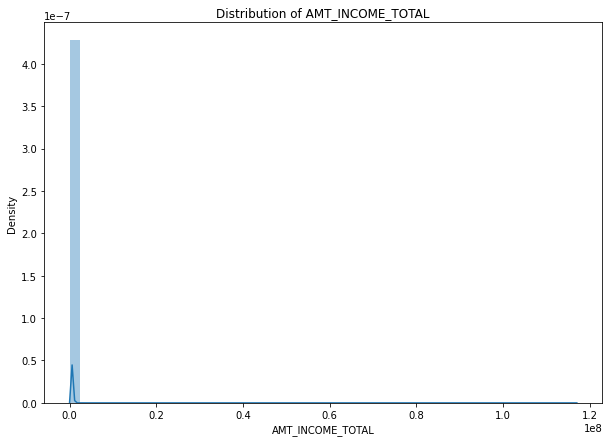

In [ ]:
distribution_plot(train, 'AMT_INCOME_TOTAL')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



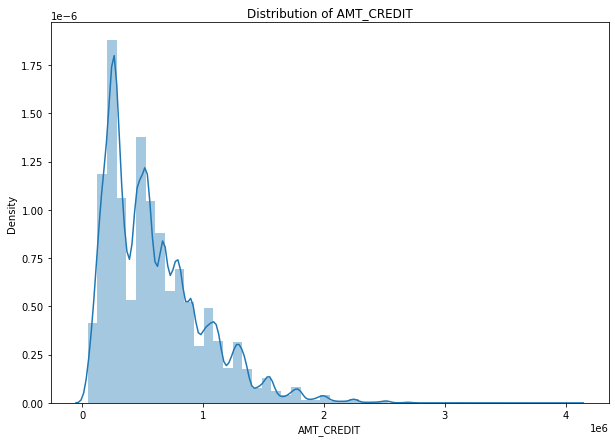

In [ ]:
distribution_plot(train, 'AMT_CREDIT')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



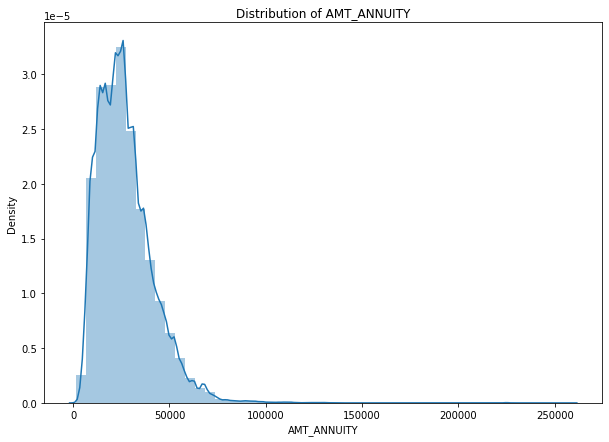

In [ ]:
distribution_plot(train, 'AMT_ANNUITY')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



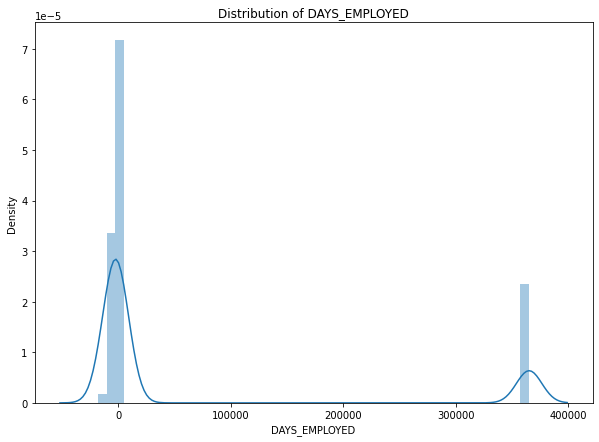

In [ ]:
distribution_plot(train, 'DAYS_EMPLOYED')

In [ ]:
train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
train['DAYS_EMPLOYED'].median()

-1213.0

Anomaly
The max value of feature 'DAYS_EMPLOYED' is positive. 365243 days = 1000 years, it's not make sense. Because this anomaly has exact same value, it can be replaced with its median value so it will be make sense

In [ ]:
train['DAYS_EMPLOYED'].replace(365243, train['DAYS_EMPLOYED'].median(), inplace=True)
train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      -2173.274982
std        2164.676336
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -933.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



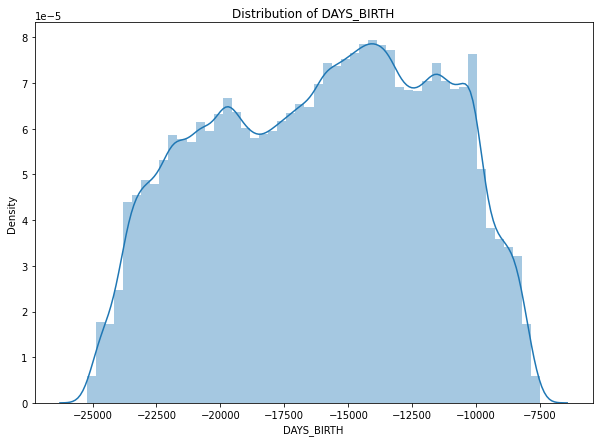

In [ ]:
distribution_plot(train, 'DAYS_BIRTH')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



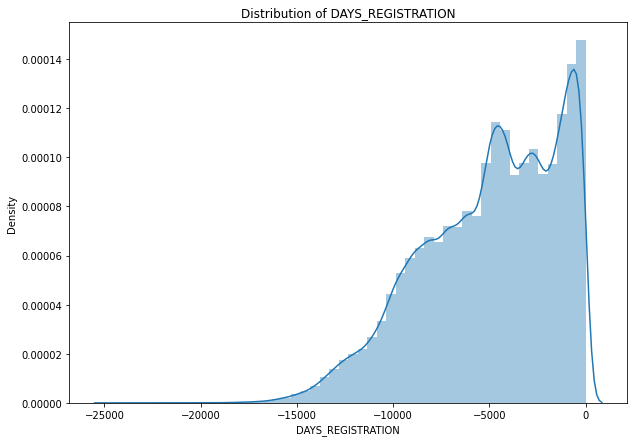

In [ ]:
distribution_plot(train, 'DAYS_REGISTRATION')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



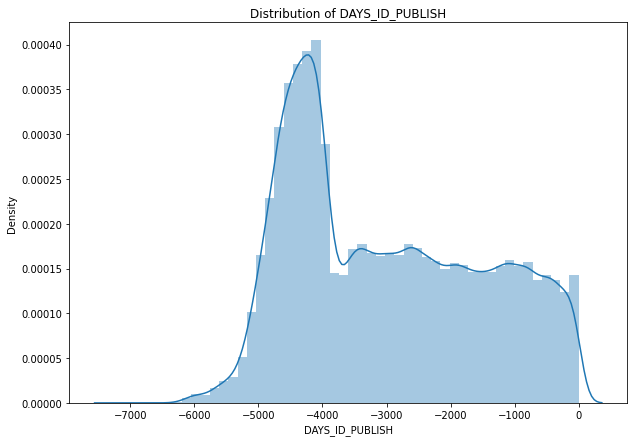

In [ ]:
distribution_plot(train, 'DAYS_ID_PUBLISH')

##DATA PREPROCESSING

In [ ]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
# Missing Values Visualization

'''import missingno as msno

msno.matrix(train, figsize=(50, 20), labels=True)
plt.show()'''

'import missingno as msno\n\nmsno.matrix(train, figsize=(50, 20), labels=True)\nplt.show()'

In [ ]:
null = train.isnull().sum()
null_df = pd.DataFrame(null, columns=['null_count'])
null_df['null percentage'] = null_df['null_count']/len(train)*100
null_df.sort_values(by ='null percentage',ascending=False)

,null_count,null percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [ ]:
high_null_df = null_df.loc[(null_df['null percentage']>=30)]
high_null_df

,null_count,null percentage
OWN_CAR_AGE,202929,65.990810
OCCUPATION_TYPE,96391,31.345545
EXT_SOURCE_1,173378,56.381073
APARTMENTS_AVG,156061,50.749729
BASEMENTAREA_AVG,179943,58.515956
YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
YEARS_BUILD_AVG,204488,66.497784
COMMONAREA_AVG,214865,69.872297
ELEVATORS_AVG,163891,53.295980
ENTRANCES_AVG,154828,50.348768


Eliminating features that have missing value more than 30%

In [ ]:
eliminated_features= list(high_null_df.index)
len(eliminated_features)

50

In [ ]:
#Dropping columns of eliminated features in train and test data
train_v2 = train.drop(labels = eliminated_features, axis=1)
test_v2 = test.drop(labels = eliminated_features, axis=1)

In [ ]:
#Number of dataset columns after dropping some features
print('Number of train columns after feature elimination:', train_v2.shape[1])
print('Number of test columns after feature elimination:', test_v2.shape[1])

Number of train columns after feature elimination: 72
Number of test columns after feature elimination: 71


In [ ]:
#Data types of remaining columns
train_v2.dtypes.value_counts()

int64      41
float64    20
object     11
dtype: int64

In [ ]:
train_v2.dtypes.head(25)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
dtype: object

In [ ]:
#Checking the remaining columns that have missing values
null = train_v2.isnull().sum()
null_df = pd.DataFrame(null, columns=['null_count'])
for idx in null_df.index:
    null_df.loc[idx,'dtypes']= train[idx].dtypes
null_column = null_df.loc[null_df['null_count']>0].sort_values(by ='null_count', ascending=False)
null_column

,null_count,dtypes
EXT_SOURCE_3,60965,float64
AMT_REQ_CREDIT_BUREAU_YEAR,41519,float64
AMT_REQ_CREDIT_BUREAU_QRT,41519,float64
AMT_REQ_CREDIT_BUREAU_MON,41519,float64
AMT_REQ_CREDIT_BUREAU_WEEK,41519,float64
AMT_REQ_CREDIT_BUREAU_DAY,41519,float64
AMT_REQ_CREDIT_BUREAU_HOUR,41519,float64
NAME_TYPE_SUITE,1292,object
DEF_60_CNT_SOCIAL_CIRCLE,1021,float64
OBS_60_CNT_SOCIAL_CIRCLE,1021,float64


In [ ]:
#Remaining categorical column that still have missing value is NAME_TYPE_SUITE only. Further we replace the missing value with the most frequent value (Unaccompanied)
train_v2['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
numeric_var=null_column.loc[null_column['dtypes']=='float64'].index
category_var=null_column.loc[null_column['dtypes']=='object'].index

In [ ]:
def distribution_plot(df, feature):
    plt.figure(figsize=(10,7))
    plt.title('Distribution of %s' % feature)
    sns.distplot(df[feature].dropna(),kde=True)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



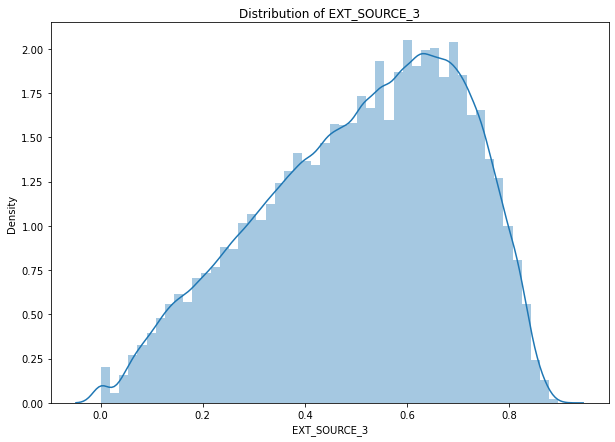

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



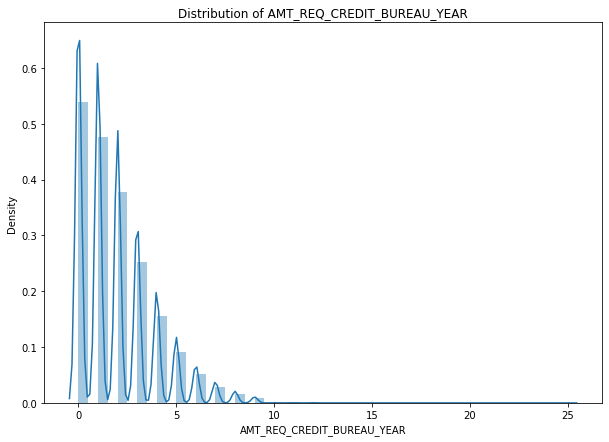

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



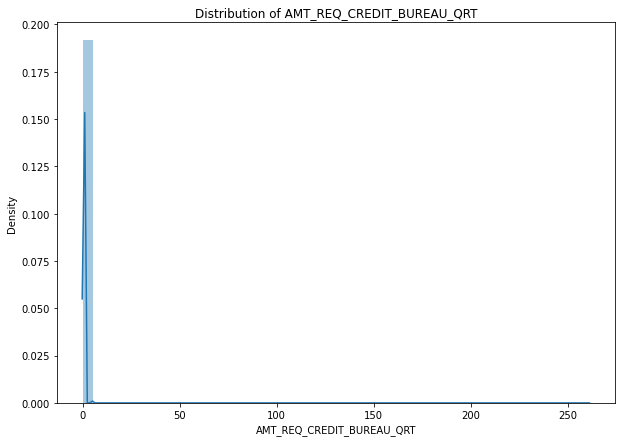

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



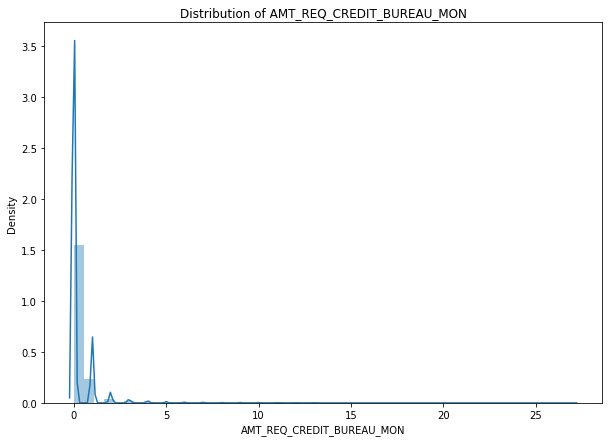

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



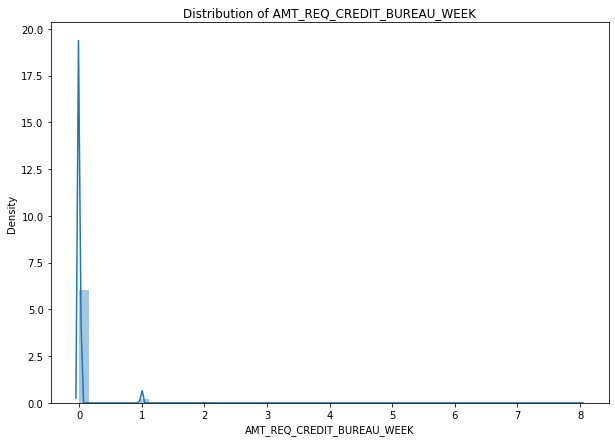

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



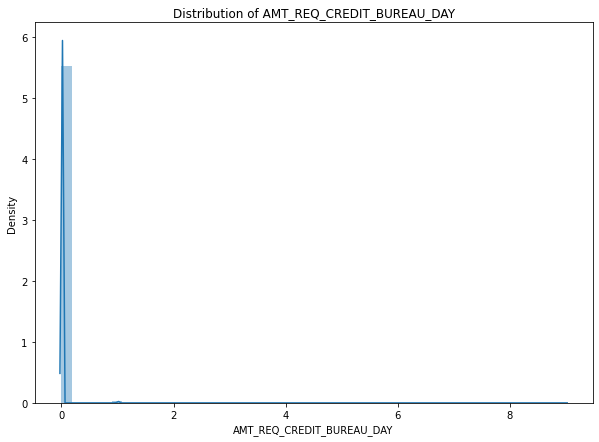

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



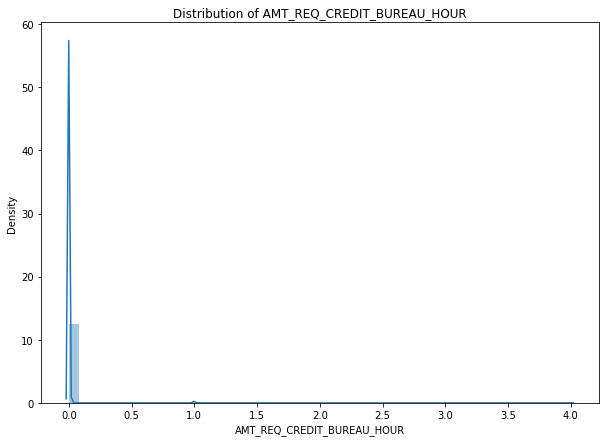

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



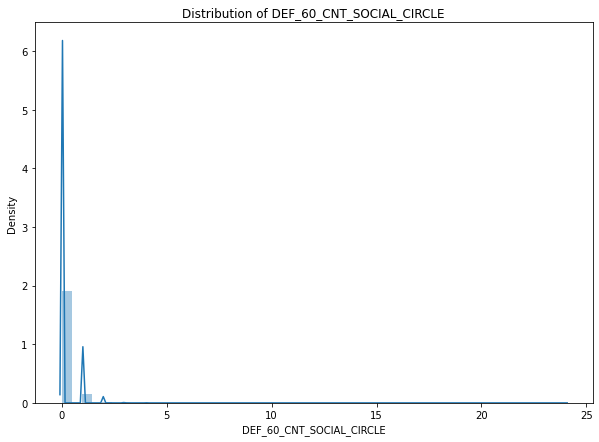

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



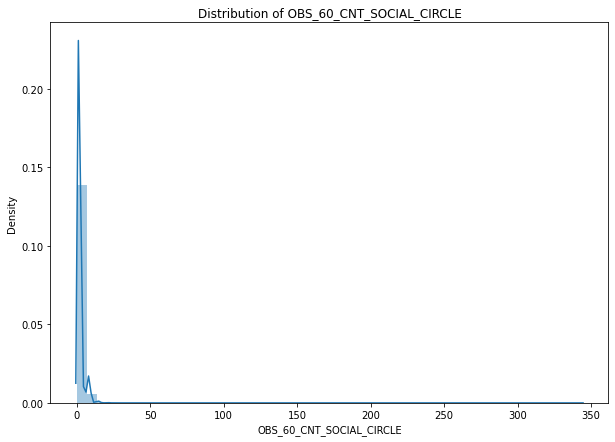

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



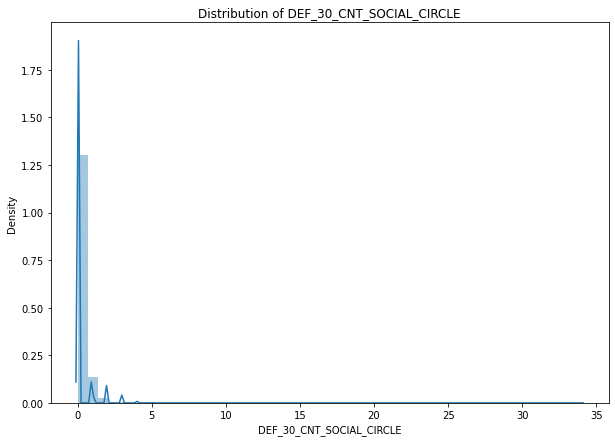

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



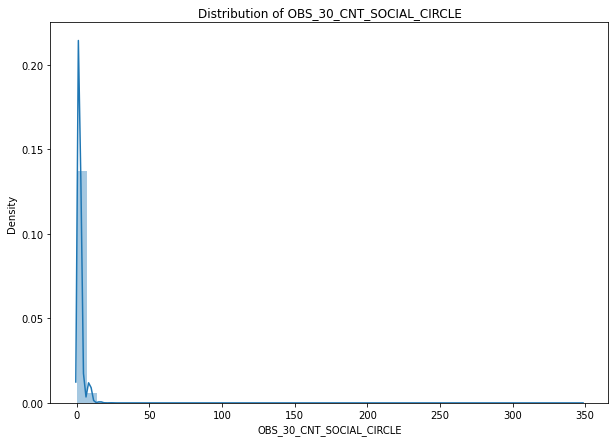

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



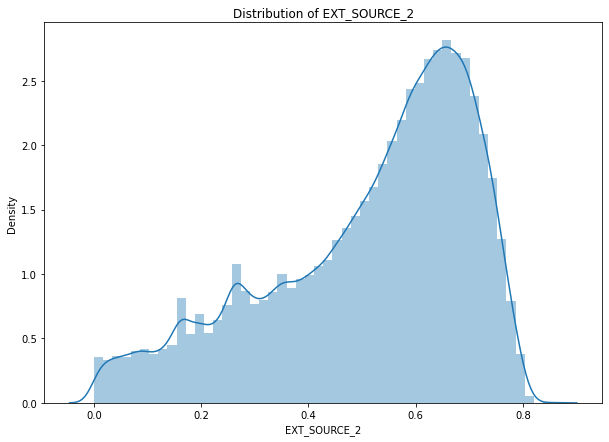

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



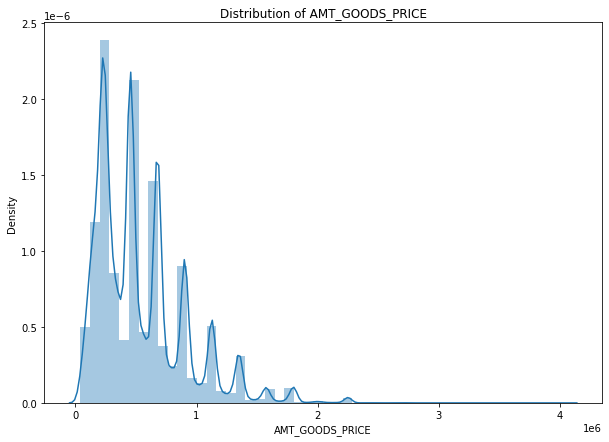

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



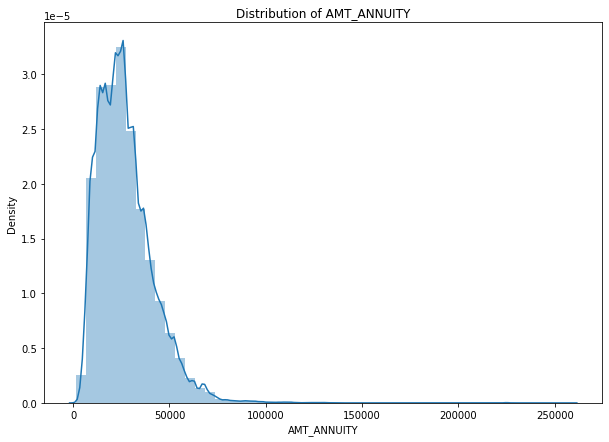

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



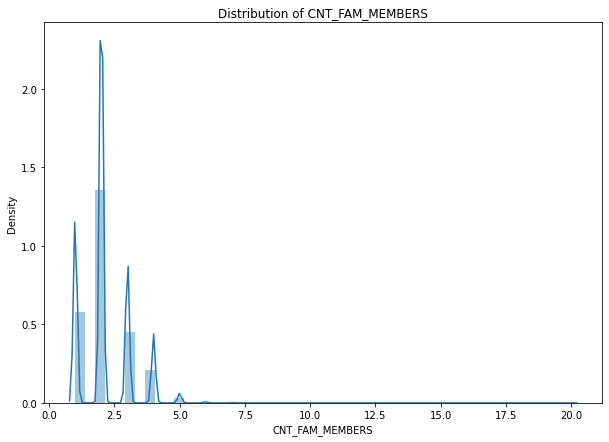

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



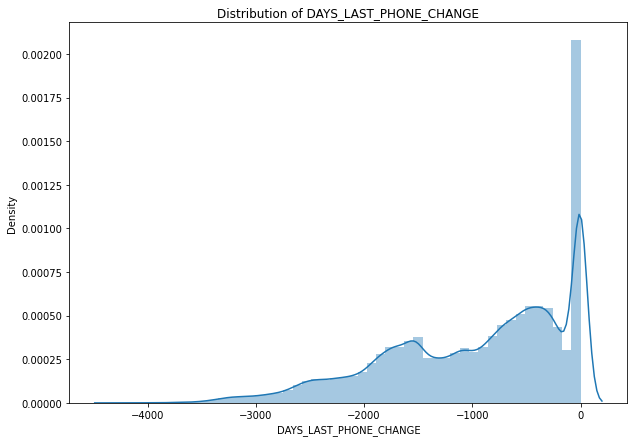

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


In [ ]:
for features in numeric_var:
    distribution_plot(train_v2,features)
    plt.show()
    print(train_v2[features].describe())

From distribution of the numerical variables, filling the missing value of them more appropriate with median because of the skewed distribution and there are some outliers

In [ ]:
#Check duplicated data
train_v2.duplicated().sum()

0

##FEATURE SELECTION WITH PPS SCORE

In [ ]:
pip install ppscore

     |████████████████████████████████| 51kB 4.9MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13050 sha256=b4e3c2eeb5f77c8067942e0f5064f35f716a52748cb4c68100f5ac22258b08cb
  Stored in directory: /root/.cache/pip/wheels/50/cc/8f/d0da07e4ec4e7a4c4cf32aee9057e4d1c318de910543b4684e
Successfully built ppscore


In [ ]:
#Checking relationship between ORGANIZATION_TYPE and TARGET with PPS
import ppscore as pps
pps.score(train_v2,'ORGANIZATION_TYPE','TARGET')

{'baseline_score': 0.0848,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'model_score': 0.15497100863682461,
 'ppscore': 0,
 'x': 'ORGANIZATION_TYPE',
 'y': 'TARGET'}

Drop ORGANIZATION_TYPE as feature because it has ppscore of 0 with TARGET so it's not a good predictor for TARGET


In [ ]:
train_v2 = train_v2.drop(labels='ORGANIZATION_TYPE', axis=1)
test_v2 = test_v2.drop(labels='ORGANIZATION_TYPE', axis=1)

##IMPUTATION

In [ ]:
#Impute missing value to numerical and categorical variables
#1 Seperation of columns into numeric and categorical columns
train_target = train['TARGET']
train_v2 = train_v2.drop(['TARGET'], axis=1)
types = np.array([dt for dt in train_v2.dtypes])
all_columns = test_v2.columns.values
is_num = types != 'object'
num_cols = all_columns[is_num]
cat_cols = all_columns[~is_num]

from sklearn.impute import SimpleImputer
#Impute numerical variables with median because of distribution of each numerical variable is not normal and has outliers
num_imputer = SimpleImputer(strategy='median')
# Fit_transform on the training data and transform on test data
# Transform both training and testing data
train_num = num_imputer.fit_transform(train_v2[num_cols])
test_num = num_imputer.transform(test_v2[num_cols])
#Transforming back to dataframe
train_num = pd.DataFrame(train_num, columns=num_cols)
test_num = pd.DataFrame(test_num, columns=num_cols)

#Impute categorical values with constant strategy
cat_imputer = SimpleImputer(strategy= 'constant', fill_value='Unaccompanied')
# Transform both training and testing data
train_cat = cat_imputer.fit_transform(train_v2[cat_cols])
test_cat = cat_imputer.transform(test_v2[cat_cols])
#Transforming back to dataframe
train_cat = pd.DataFrame(train_cat, columns=cat_cols)
test_cat = pd.DataFrame(test_cat, columns=cat_cols)

#Concat num columns and cat columns to a dataframe named train_final and test_final
train_final = pd.DataFrame(train_target)
train_final= pd.concat([train_final, train_num],axis=1)
train_final= pd.concat([train_final, train_cat],axis=1)
test_final= pd.concat([test_num, test_cat],axis=1)

In [ ]:
#Before encode the object/categorical variables, let's now look at the number of unique entries in each of them
train_final.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE            2
CODE_GENDER                   3
FLAG_OWN_CAR                  2
FLAG_OWN_REALTY               2
NAME_TYPE_SUITE               7
NAME_INCOME_TYPE              8
NAME_EDUCATION_TYPE           5
NAME_FAMILY_STATUS            6
NAME_HOUSING_TYPE             6
WEEKDAY_APPR_PROCESS_START    7
dtype: int64

In [ ]:
test_final.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE            2
CODE_GENDER                   2
FLAG_OWN_CAR                  2
FLAG_OWN_REALTY               2
NAME_TYPE_SUITE               7
NAME_INCOME_TYPE              7
NAME_EDUCATION_TYPE           5
NAME_FAMILY_STATUS            5
NAME_HOUSING_TYPE             6
WEEKDAY_APPR_PROCESS_START    7
dtype: int64

In [ ]:
train_final['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
#Replacing CODE_GENDER 'XNA' with 'F'
train_final['CODE_GENDER'].replace('XNA', 'F',inplace=True)

##ENCODING

In [ ]:
#Label encoding of categorical columns with only 2 categories
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in train_final:
    #iterating category columns
    if train_final[col].dtype=='object':
        #if category columns have 2 categories
        if len(list(train_final[col].unique()))==2:
            encoder.fit(train_final[col])
            train_final[col] = encoder.transform(train_final[col])
            test_final[col] = encoder.transform(test_final[col])

In [ ]:
#One-hot encoding categorical columns
train_final = pd.get_dummies(train_final)
test_final = pd.get_dummies(test_final)

print('Train dataset shape: ', train_final.shape)
print('Test dataset shape: ', test_final.shape)

Train dataset shape:  (307511, 104)
Test dataset shape:  (48744, 101)


In [ ]:
train_final.columns.values

array(['TARGET', 'SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_

In [ ]:
train_v2.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE            2
CODE_GENDER                   3
FLAG_OWN_CAR                  2
FLAG_OWN_REALTY               2
NAME_TYPE_SUITE               7
NAME_INCOME_TYPE              8
NAME_EDUCATION_TYPE           5
NAME_FAMILY_STATUS            6
NAME_HOUSING_TYPE             6
WEEKDAY_APPR_PROCESS_START    7
dtype: int64

##ALIGN TRAIN AND TEST DATASET

In [ ]:
#Train and test dataset have different number of columns because they have different numbers of categories in some of the category columns/variables so one hot encoding made different number of columns to them
#So we need to align train and test data so they both has the same columns/features
train_target = train_final['TARGET']
train_final, test_final = train_final.align(test_final, join=  'inner', axis = 1)
train_final['TARGET'] = train_target

print('Train dataset shape: ', train_final.shape)
print('Test dataset shape: ', test_final.shape)

Train dataset shape:  (307511, 102)
Test dataset shape:  (48744, 101)


In [ ]:
#One-hot encoding categorical variables
'''new_dataset_copy = pd.get_dummies(new_dataset_copy)
new_dataset_copy.shape'''

'new_dataset_copy = pd.get_dummies(new_dataset_copy)\nnew_dataset_copy.shape'

##Feature elimination with multicollinearity

In [ ]:
#Make correlation matrix between variables
corrMatrix = train_final.corr()
corrMatrix

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,...,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,TARGET
SK_ID_CURR,1.000000,-0.001129,-0.001820,-0.000343,-0.000431,-0.000258,0.000849,-0.001500,0.000209,-0.000973,-0.000384,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.002319,0.000184,-0.001413,-0.000085,-0.001427,0.001182,-0.000859,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,...,0.001216,0.000703,-0.001234,-0.000849,0.000292,0.000356,0.002849,-0.000131,0.000497,-0.000154,0.000685,0.001399,0.001950,-0.001551,-0.001953,-0.002610,0.001034,-0.000495,0.002880,0.001758,-0.001154,0.000285,-0.003959,0.001956,0.003415,0.000580,0.000345,-0.001874,-0.000549,0.000272,0.003522,0.000976,-0.001901,-0.000888,-0.000104,0.002104,-0.000886,0.001446,0.001000,-0.002108
CNT_CHILDREN,-0.001129,1.000000,0.012882,0.002145,0.021377,-0.001856,-0.025573,0.330938,0.007191,0.183395,-0.028019,0.001041,0.240714,0.055630,-0.000794,-0.029906,0.022619,0.879160,0.025423,0.024781,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,-0.017990,-0.039543,0.015662,-0.001205,0.015302,-0.001811,-0.005866,0.001786,0.056837,-0.003709,-0.016737,-0.157024,-0.001498,...,0.102023,-0.002366,0.011574,0.005798,-0.001066,-0.002564,0.001656,0.036731,-0.025689,-0.002504,0.028649,-0.240719,0.047311,0.001467,-0.002755,0.136604,-0.001248,0.033654,0.006012,-0.009497,-0.031837,-0.015026,0.172702,-0.021851,-0.141051,-0.103722,0.009789,-0.020725,-0.002571,0.013461,0.012444,0.017040,-0.003816,0.003794,0.007121,0.005984,-0.003924,-0.003239,-0.002334,0.019187
AMT_INCOME_TOTAL,-0.001820,0.012882,1.000000,0.156870,0.191657,0.159632,0.074796,0.027261,-0.025887,0.027805,0.008506,0.000325,0.063994,-0.017193,-0.008290,0.000159,0.038378,0.016341,-0.085465,-0.091735,0.036459,0.031191,0.062340,0.058059,0.003574,0.006431,0.008285,0.060855,-0.030737,-0.013495,-0.013454,-0.013411,-0.013314,-0.018585,-0.001000,-0.016751,0.000529,0.001507,-0.045878,0.003825,...,0.083383,0.002934,-0.011193,-0.006845,-0.000627,-0.002048,-0.004985,-0.010408,

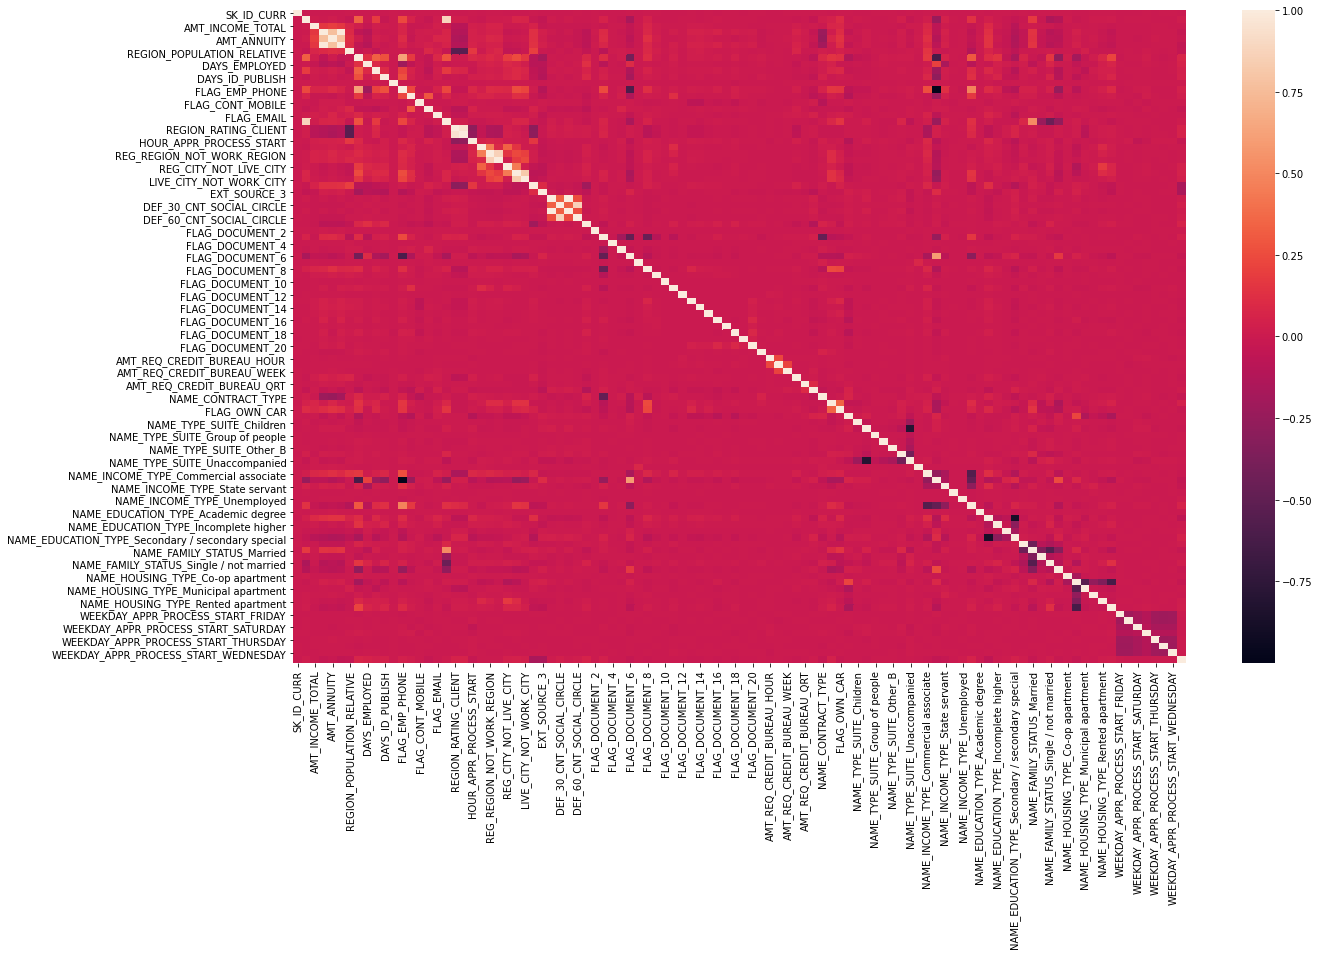

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(corrMatrix)
plt.show()

Labels of correlation strength from https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression:

* 0 - 0.19:  very weak
* 0.2 - 0.39 : weak
* 0.40 - 0.59: moderate 
* 0.6 - 0.79 : strong 
* 0.8 - 1 : very strong

In [ ]:
#Unstack the correlation matrix and filter correlation value >= 0.6
corr_pairs = corrMatrix.unstack()
sorted_pairs = corr_pairs.sort_values()
strong_pairs = sorted_pairs[abs(sorted_pairs) >= 0.6]
pd.set_option("max_rows", None)
strong_pairs =pd.DataFrame(strong_pairs).reset_index()
strong_pairs.columns=['var1','var2','corr']
strong_pairs

,var1,var2,corr
0,NAME_INCOME_TYPE_Pensioner,FLAG_EMP_PHONE,-0.999515
1,FLAG_EMP_PHONE,NAME_INCOME_TYPE_Pensioner,-0.999515
2,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Higher education,-0.888002
3,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,-0.888002
4,NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_Family,-0.806376
5,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Unaccompanied,-0.806376
6,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_House / apartment,-0.631969
7,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_With parents,-0.631969
8,DAYS_BIRTH,NAME_INCOME_TYPE_Pensioner,-0.620069
9,NAME_INCOME_TYPE_Pensioner,DAYS_BIRTH,-0.620069


In [ ]:
#Dropping correlation of variable with the variable itself
indexName = strong_pairs.loc[strong_pairs['var1']==strong_pairs['var2']].index
strong_pairs.drop(indexName,inplace=True)
strong_pairs

,var1,var2,corr
0,NAME_INCOME_TYPE_Pensioner,FLAG_EMP_PHONE,-0.999515
1,FLAG_EMP_PHONE,NAME_INCOME_TYPE_Pensioner,-0.999515
2,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Higher education,-0.888002
3,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,-0.888002
4,NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_Family,-0.806376
5,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Unaccompanied,-0.806376
6,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_House / apartment,-0.631969
7,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_With parents,-0.631969
8,DAYS_BIRTH,NAME_INCOME_TYPE_Pensioner,-0.620069
9,NAME_INCOME_TYPE_Pensioner,DAYS_BIRTH,-0.620069


In [ ]:
idx = 1
row_list=[]
while idx<len(strong_pairs):
    if strong_pairs.loc[idx,'var1']==strong_pairs.loc[(idx-1),'var2']:
        row_list.append(idx)
    idx+=1
strong_pairs.drop(row_list,inplace=True)

In [ ]:
strong_pairs.reset_index(inplace=True)
strong_pairs.drop('index',axis=1, inplace=True)
strong_pairs.sort_values(by=['var1','var2'])

,var1,var2,corr
6,AMT_ANNUITY,AMT_CREDIT,0.770127
13,AMT_CREDIT,AMT_GOODS_PRICE,0.986734
7,AMT_GOODS_PRICE,AMT_ANNUITY,0.774837
11,CNT_FAM_MEMBERS,CNT_CHILDREN,0.879160
4,DAYS_BIRTH,NAME_INCOME_TYPE_Pensioner,-0.620069
9,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.860556
5,FLAG_EMP_PHONE,DAYS_BIRTH,0.619888
10,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.860627
1,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Higher education,-0.888002
3,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_House / apartment,-0.631969


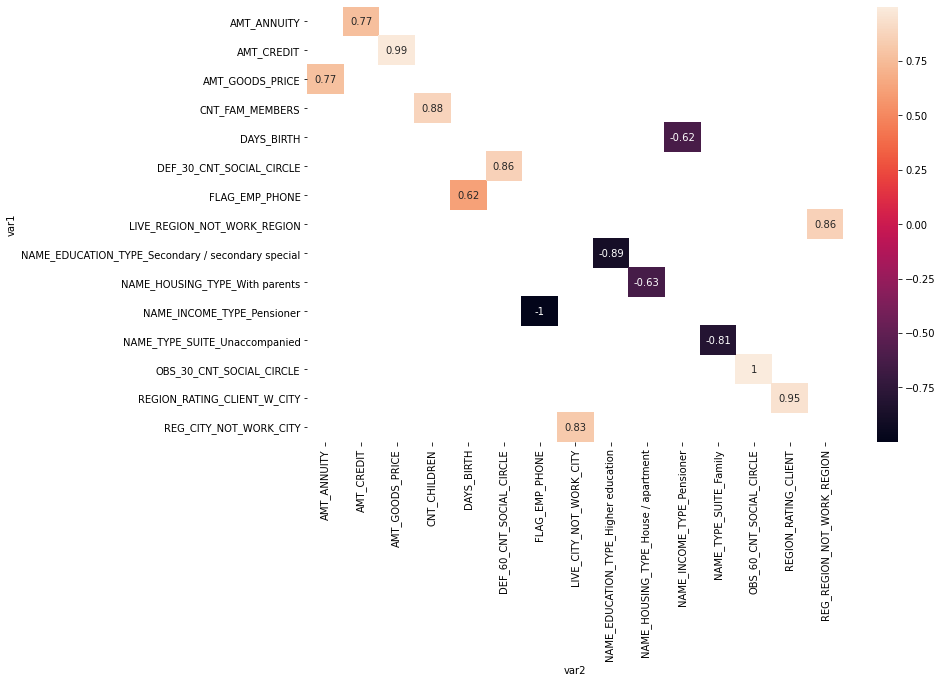

In [ ]:
#Visualization of strong pairs with heatmap 
pivot = strong_pairs.pivot(index='var1', columns= 'var2', values='corr')
plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True)
plt.show()

In [ ]:
eliminated_features_2 = ['AMT_CREDIT','AMT_GOODS_PRICE','CNT_CHILDREN','NAME_INCOME_TYPE_Pensioner','DEF_60_CNT_SOCIAL_CIRCLE','FLAG_EMP_PHONE','REG_REGION_NOT_WORK_REGION','NAME_EDUCATION_TYPE_Higher education',
                         'NAME_HOUSING_TYPE_House / apartment','NAME_TYPE_SUITE_Family','OBS_60_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT','LIVE_CITY_NOT_WORK_CITY']
len(eliminated_features_2)

13

In [ ]:
#Dropping variable that contains the same information with another variable (multicollinearity)
train_final = train_final.drop(labels=eliminated_features_2,axis=1)
test_final = test_final.drop(labels=eliminated_features_2,axis=1)

print('Train dataset shape: ', train_final.shape)
print('Test dataset shape: ', test_final.shape)

Train dataset shape:  (307511, 89)
Test dataset shape:  (48744, 88)


In [ ]:
train_final.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,TARGET
0,100002.0,202500.0,24700.5,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,10.0,0.0,0.0,0.0,0.0,0.262949,0.139376,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,100003.0,270000.0,35698.5,0.003541,-16765.0,-1188.0,-1186.0,-291.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,11.0,0.0,0.0,0.0,0.0,0.622246,0.535276,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,100004.0,67500.0,6750.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,9.0,0.0,0.0,0.0,0.0,0.555912,0.729567,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,100006.0,135000.0,29686.5,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.650442,0.535276,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,100007.0,121500.0,21865.5,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,11.0,0.0,0.0,0.0,1.0,0.322738,0.535276,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


##FEATURE SCALING

In [ ]:
X = train_final.copy()
X = X.drop(columns =['TARGET','SK_ID_CURR'])
y = train_final['TARGET']
X_columns = X.columns
X_test = test_final.copy()
X_test = X_test.drop(columns =['SK_ID_CURR'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X)
X_test = scaler.transform(X_test)

X = pd.DataFrame(X_train, columns = X_columns)
X_test =  pd.DataFrame(X_test, columns = X_columns)

In [ ]:
X.head()

,AMT_INCOME_TOTAL,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,0.001512,0.090032,0.256321,0.888839,0.964437,0.852140,0.705433,1.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.434783,0.0,0.0,0.0,0.0,0.307542,0.155054,0.005747,0.058824,0.735788,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.04,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.002089,0.132924,0.045016,0.477114,0.933676,0.951929,0.959566,1.0,0.0,1.0,1.0,0.0,0.052632,0.0,0.478261,0.0,0.0,0.0,0.0,0.727773,0.597163,0.002874,0.000000,0.807083,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000358,0.020025,0.134897,0.348534,0.987439,0.827335,0.648326,1.0,1.0,1.0,1.0,0.0,0.000000,0.5,0.391304,0.0,0.0,0.0,0.0,0.650190,0.814130,0.000000,0.000000,0.810112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000935,0.109477,0.107023,0.350846,0.830337,0.601451,0.661387,1.0,0.0,1.0,0.0,0.0,0.052632,0.5,0.739130,0.0,0.0,0.0,0.0,0.760751,0.597163,0.005747,0.000000,0.856244,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000819,0.078975,0.392880,0.298591,0.830393,0.825268,0.519522,1.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.478261,0.0,0.0,0.0,1.0,0.377472,0.597163,0.000000,0.000000,0.742311,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_test.head()

,AMT_INCOME_TOTAL,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,0.000935,0.073886,0.257000,0.337542,0.869975,0.790451,0.887175,1.0,0.0,1.0,0.0,1.0,0.052632,0.5,0.782609,0.0,0.0,0.0,0.0,0.923573,0.177549,0.0,0.0,0.594595,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000627,0.061443,0.491595,0.403890,0.750502,0.630431,0.774489,1.0,0.0,1.0,0.0,0.0,0.052632,0.5,0.391304,0.0,0.0,0.0,0.0,0.341118,0.482907,0.0,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.12,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001512,0.265830,0.260475,0.292616,0.751117,0.911843,0.513269,1.0,0.0,1.0,0.0,0.0,0.052632,0.5,0.608696,0.0,0.0,0.0,0.0,0.818464,0.681715,0.0,0.0,0.800559,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.003831,0.16,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.002474,0.184872,0.361433,0.634329,0.895824,0.918936,0.415312,1.0,0.0,1.0,1.0,0.0,0.157895,0.5,0.478261,0.0,0.0,0.0,0.0,0.596114,0.683628,0.0,0.0,0.579450,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.001320,0.118761,0.134897,0.687091,0.877680,0.837873,0.407809,1.0,1.0,1.0,0.0,0.0,0.105263,0.5,0.217391,0.0,0.0,0.0,1.0,0.497880,0.597163,0.0,0.0,0.808714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.04,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


##MODELLING

In [ ]:
#Split X and y
from sklearn.model_selection import train_test_split
X_train,  X_val, y_train, y_val = train_test_split(X,y, test_size=0.3, random_state=99)

##LOGISTIC REGRESSION

We want to predict the probability of not repaying loan on time for each client from range 0 - 1

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Make predictions using train and validation dataset
log_reg_train = log_reg.predict_proba(X_train)[:,1]
log_reg_val = log_reg.predict_proba(X_val)[:,1]

In [ ]:
#AUC score of predictions for train and validation dataset 
from sklearn.metrics import roc_auc_score
auc_lr_train = roc_auc_score(y_train, log_reg_train)
auc_lr_val = roc_auc_score(y_val, log_reg_val)
print('AUC score train:',auc_lr_train)
print('AUC score validation:',auc_lr_val)

AUC score train: 0.7390109581741515
AUC score validation: 0.7381545662580468


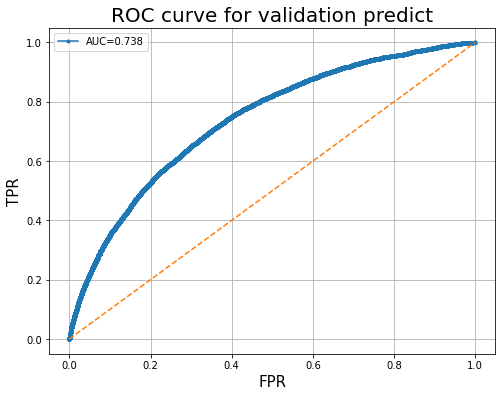

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, log_reg_val)
auc = roc_auc_score(y_val,log_reg_val)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve for validation predict', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predicted_y):
    # Confusion matrix
    C = confusion_matrix(test_y, predicted_y)
    
    # Recall matrix
    A = (((C.T)/(C.sum(axis=1))).T)
    
    # Precision matrix
    B = (C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    labels = ['Re-paid(0)','Not Re-paid(1)']
    cmap=sns.light_palette("purple")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Confusion matrix')
    
    plt.subplot(1,3,2)
    sns.heatmap(A, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Recall matrix')
    
    plt.subplot(1,3,3)
    sns.heatmap(B, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Precision matrix')
    
    plt.show()

##Hyperparamater Optimization for Logistic Regression

Tuning C parameter. C is inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization. That means smaller values reduce overfitting.
Also set the class_weight parameter = 'balanced' to overcome imbalanced data. The first logistic regression model we build, use default C = 1. This may cause overfitted model.

In [ ]:
def cv_plot(alpha, cv_auc):
    
    fig, ax = plt.subplots()
    ax.plot(np.log10(alpha), cv_auc,c='g')
    for i, txt in enumerate(np.round(cv_auc,3)):
        ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_auc[i]))
    plt.grid()
    plt.xticks(np.log10(alpha))
    plt.title("Cross Validation Error for each alpha")
    plt.xlabel("Alpha i's")
    plt.ylabel("Error measure")
    plt.show()

For alpha 0.0001, cross validation AUC score 0.7371087847643562
For alpha 0.001, cross validation AUC score 0.7367407049460548
For alpha 0.01, cross validation AUC score 0.732174280497052
For alpha 0.1, cross validation AUC score 0.7035022568919262
For alpha 1.0, cross validation AUC score 0.681250364266467
For alpha 10.0, cross validation AUC score 0.6755037650346677
For alpha 100.0, cross validation AUC score 0.6659750683919053
For alpha 1000.0, cross validation AUC score 0.6718448937205439
For alpha 10000.0, cross validation AUC score 0.6761936021468582


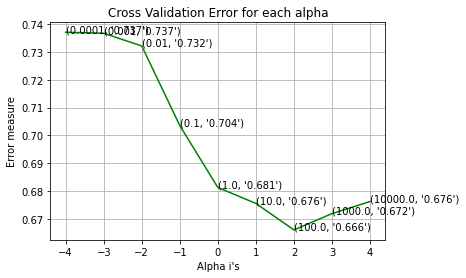

The Optimal C value is: 0.0001


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
alpha = np.logspace(-4,4,9)
cv_auc_score = []
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log',class_weight = 'balanced', max_iter=1000, random_state = 77)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train, y_train)
    y_pred_prob = sig_clf.predict_proba(X_val)[:,1]
    cv_auc_score.append(roc_auc_score(y_val,y_pred_prob))
    print('For alpha {0}, cross validation AUC score {1}'.format(i,roc_auc_score(y_val,y_pred_prob)))
cv_plot(alpha, cv_auc_score)
print('The Optimal C value is:', alpha[np.argmax(cv_auc_score)])

In [ ]:
#Logistic Regression using C=0.0001
log_reg = LogisticRegression(C=0.0001, class_weight = 'balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#AUC score for train and validation datasetet after tuning
#Make predictions
log_reg_train = log_reg.predict_proba(X_train)[:,1]
log_reg_val = log_reg.predict_proba(X_val)[:,1]

auc_lr_train = roc_auc_score(y_train, log_reg_train)
auc_lr_val = roc_auc_score(y_val, log_reg_val)
print('AUC score train:',auc_lr_train)
print('AUC score validation:',auc_lr_val)

AUC score train: 0.7116682215157382
AUC score validation: 0.7146941006956531


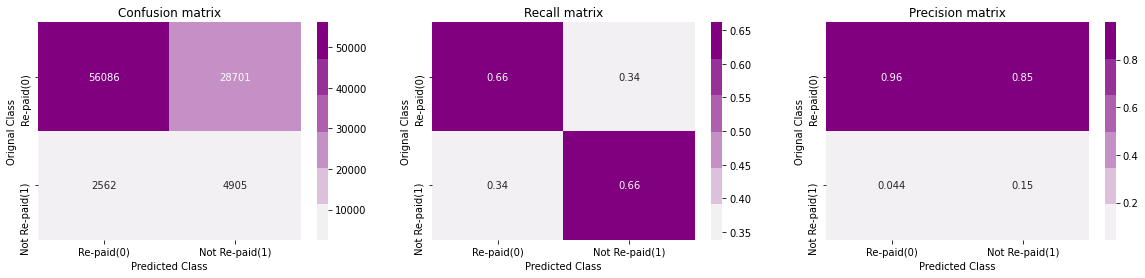

In [ ]:
#Confusion matrix
y_pred_lr = log_reg.predict(X_val)
plot_confusion_matrix(y_val, y_pred_lr)

In [ ]:
#Make predictions using test dataset
log_reg_predict = log_reg.predict_proba(X_test)[:,1]

In [ ]:
#Submission dataframe
submit_lr = test_final[['SK_ID_CURR']].astype(int)
submit_lr['TARGET'] = log_reg_predict

In [ ]:
submit_lr.head()

,SK_ID_CURR,TARGET
0,100001,0.446660
1,100005,0.588639
2,100013,0.380450
3,100028,0.460051
4,100038,0.586916


In [ ]:
# Save the submission to a csv file
submit_lr.to_csv('log_reg.csv', index = False)

In [ ]:
'''files.download('log_reg.csv')'''

"files.download('log_reg.csv')"

This model got 0.61402 score when submitted

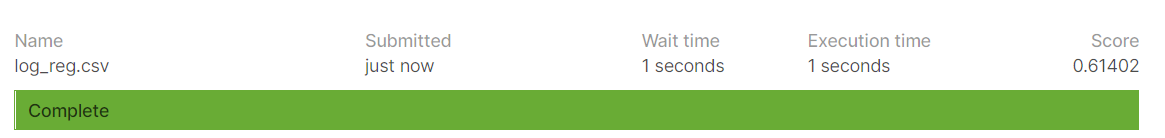

##RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Make predictions using train and validation dataset
rf_train = rf.predict_proba(X_train)[:,1]
rf_val = rf.predict_proba(X_val)[:,1]

In [ ]:
#AUC score of predictions for train and validation dataset 
auc_rf_train = roc_auc_score(y_train, rf_train)
auc_rf_val = roc_auc_score(y_val, rf_val)
print('AUC score train:',auc_rf_train)
print('AUC score validation:',auc_rf_val)

AUC score train: 1.0
AUC score validation: 0.7075288471044882


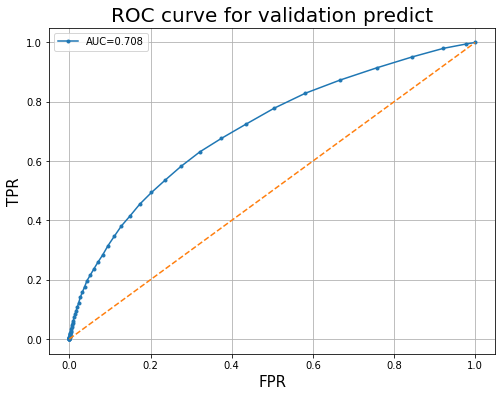

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, rf_val)
auc = roc_auc_score(y_val,rf_val)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve for validation predict', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

##HYPERPARAMETER OPTIMIZATION FOR RANDOM FOREST MODEL

Set the class_weight parameter = 'balanced' to overcome imbalanced data

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
alpha = [100,200,500,1000,2000]
max_depth = [7, 10]
cv_auc_score = []
for i in alpha:
    for j in max_depth:
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j,class_weight='balanced',
                                     random_state=42, n_jobs=-1)
        clf.fit(X_train, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train, y_train)
        y_pred = sig_clf.predict_proba(X_val)[:,1]
        cv_auc_score.append(roc_auc_score(y_val,y_pred))
        print('For n_estimators {0}, max_depth {1} cross validation AUC score {2}'.
              format(i,j,roc_auc_score(y_val,y_pred)))

For n_estimators 100, max_depth 7 cross validation AUC score 0.7314955394988178
For n_estimators 100, max_depth 10 cross validation AUC score 0.7348183367678925
For n_estimators 200, max_depth 7 cross validation AUC score 0.7311246228661871
For n_estimators 200, max_depth 10 cross validation AUC score 0.7347258322961705


KeyboardInterrupt: ignored

* For n_estimators 100, max_depth 7 cross validation AUC score 0.7314955394988178
* For n_estimators 100, max_depth 10 cross validation AUC score 0.7348183367678925
* For n_estimators 200, max_depth 7 cross validation AUC score 0.7311246228661871
* For n_estimators 200, max_depth 10 cross validation AUC score 0.7347258322961705
* For n_estimators 500, max_depth 7 cross validation AUC score 0.731582792073187
* For n_estimators 500, max_depth 10 cross validation AUC score 0.7349070646120744
* For n_estimators 1000, max_depth 7 cross validation AUC score 0.7316135737199884
* For n_estimators 1000, max_depth 10 cross validation AUC score 0.734936227252925
* For n_estimators 2000, max_depth 7 cross validation AUC score 0.7316078005816951
* For n_estimators 2000, max_depth 10 cross validation AUC score 0.734929308964081



The best parameter is  n_estimators 2000, max_depth 10 with AUC score = 0.7349

In [ ]:
#Modelling with best n_estimators 2000 and max_depth 10
rf = RandomForestClassifier(n_estimators=2000, max_depth=10, class_weight = 'balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#AUC score for train and validation datasetet after tuning
#Make predictions
rf_train = rf.predict_proba(X_train)[:,1]
rf_val = rf.predict_proba(X_val)[:,1]

auc_rf_train = roc_auc_score(y_train, rf_train)
auc_rf_val = roc_auc_score(y_val, rf_val)
print('AUC score train:',auc_rf_train)
print('AUC score validation:',auc_rf_val)

AUC score train: 0.7954490543973288
AUC score validation: 0.7349850390977064


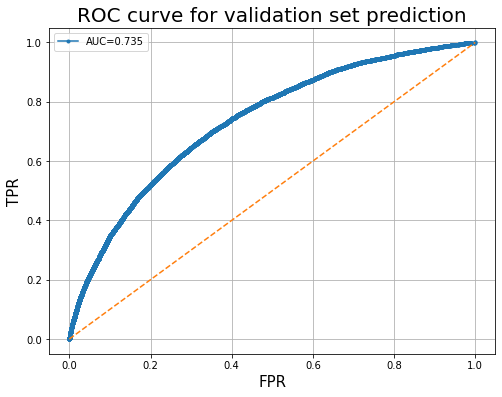

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, rf_val)
auc = roc_auc_score(y_val,rf_val)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve for validation set prediction', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

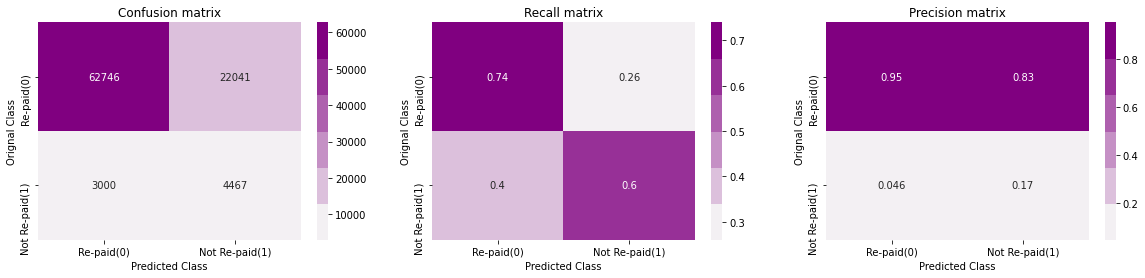

In [ ]:
#Confusion matrix
y_pred_rf = rf.predict(X_val)
plot_confusion_matrix(y_val, y_pred_rf)

In [ ]:
#Make predictions with test data
rf_predict = rf.predict_proba(X_test)[:,1]

In [ ]:
#Submission dataframe
submit_rf = test_final[['SK_ID_CURR']].astype(int)
submit_rf['TARGET'] = rf_predict

In [ ]:
submit_rf.head()

,SK_ID_CURR,TARGET
0,100001,0.437577
1,100005,0.585893
2,100013,0.229313
3,100028,0.367318
4,100038,0.597222


In [ ]:
# Save the submission to a csv file
submit_rf.to_csv('rf.csv', index = False)
'''files.download('rf.csv')'''

"files.download('rf.csv')"

This model got 0.72376 score when submitted

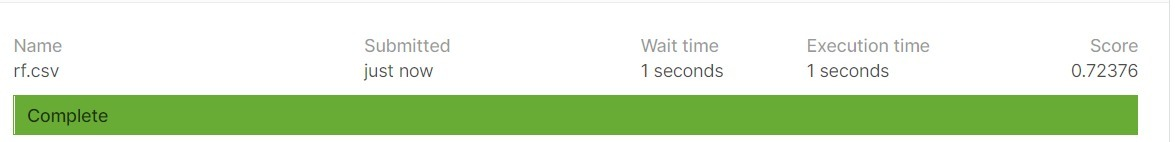

##RANDOM FOREST FEATURE IMPORTANCE

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
EXT_SOURCE_3,0.233
EXT_SOURCE_2,0.220
DAYS_EMPLOYED,0.065
DAYS_BIRTH,0.060
DAYS_LAST_PHONE_CHANGE,0.038
DAYS_ID_PUBLISH,0.035
AMT_ANNUITY,0.031
DAYS_REGISTRATION,0.027
NAME_EDUCATION_TYPE_Secondary / secondary special,0.026


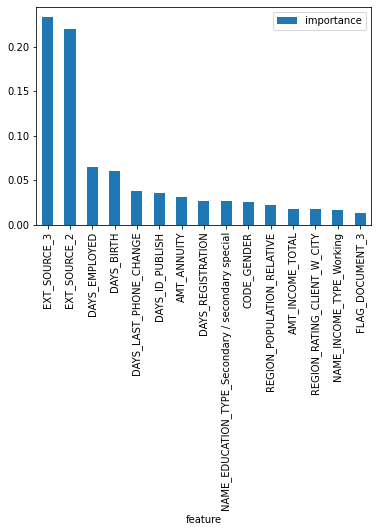

In [ ]:
importances.head(15).plot.bar()

##XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

In [ ]:
#Make predictions
xgb_predict = xgb_model.predict_proba(X_val)[:,1]

In [ ]:
roc_auc_xgb = roc_auc_score(y_val, xgb_predict)
roc_auc_xgb

In [ ]:
#Make predictions using test dataset
xgb_predict_test = xgb_model.predict_proba(X_test)[:,1]


In [ ]:
#Submission dataframe
submit_xgb = test_final[['SK_ID_CURR']].astype(int)
submit_xgb['TARGET'] = xgb_predict_test

In [ ]:
# Save the submission to a csv file
submit_xgb.to_csv('xgb_default.csv', index = False)

In [ ]:
'''files.download('xgb_default.csv')'''

In [ ]:
xgb_model = XGBClassifier(n_estimators=1000,learning_rate=0.05, n_jobs=4)
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_val, y_val)], 
             verbose=False)

In [ ]:
#Make predictions
xgb_predict = xgb_model.predict_proba(X_val)[:,1]

roc_auc_xgb = roc_auc_score(y_val, xgb_predict)
roc_auc_xgb